<a href="https://colab.research.google.com/github/jungeun919/Keras_study/blob/main/Hands-On/Housing_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 2

### setup

In [ ]:
# python 3.5 이상 필수
import sys
assert sys.version_info >= (3, 5)

# scikit-learn 0.20 이상 필수
import sklearn
assert sklearn.__version__ >= "0.20"

import numpy as np
import os

# 깔끔한 그래프를 위해
%matplotlib inline
import matplotlib.pyplot as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# 그룹을 저장할 위치
PROJECT_ROOT_DIR = "./"
CHAPTER_ID = "end_to_end_project"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

### get data

In [ ]:
import os
import tarfile
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
HOUSING_PATH = os.path.join("datasets", "housing")
HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

# 압축을 풀어 csv 파일을 내려받음
def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
    if not os.path.isdir(housing_path):
        os.makedirs(housing_path)
    tgz_path = os.path.join(housing_path, "housing.tgz")
    urllib.request.urlretrieve(housing_url, tgz_path)
    housing_tgz = tarfile.open(tgz_path)
    housing_tgz.extractall(path=housing_path)
    housing_tgz.close()

In [ ]:
fetch_housing_data()

In [ ]:
import pandas as pd

def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

In [ ]:
# dataset.head(): 처음 다섯 행 출력
# dataset.tail(): 마지막 다섯 행 출력
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 함수에 대한 간략한 설명과 전체 행 수, 각 특성의 데이터 타입, NULL이 아닌 값의 개수 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
housing["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [ ]:
# 숫자형 특성만 출력
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Saving figure attribute_histogram_plots


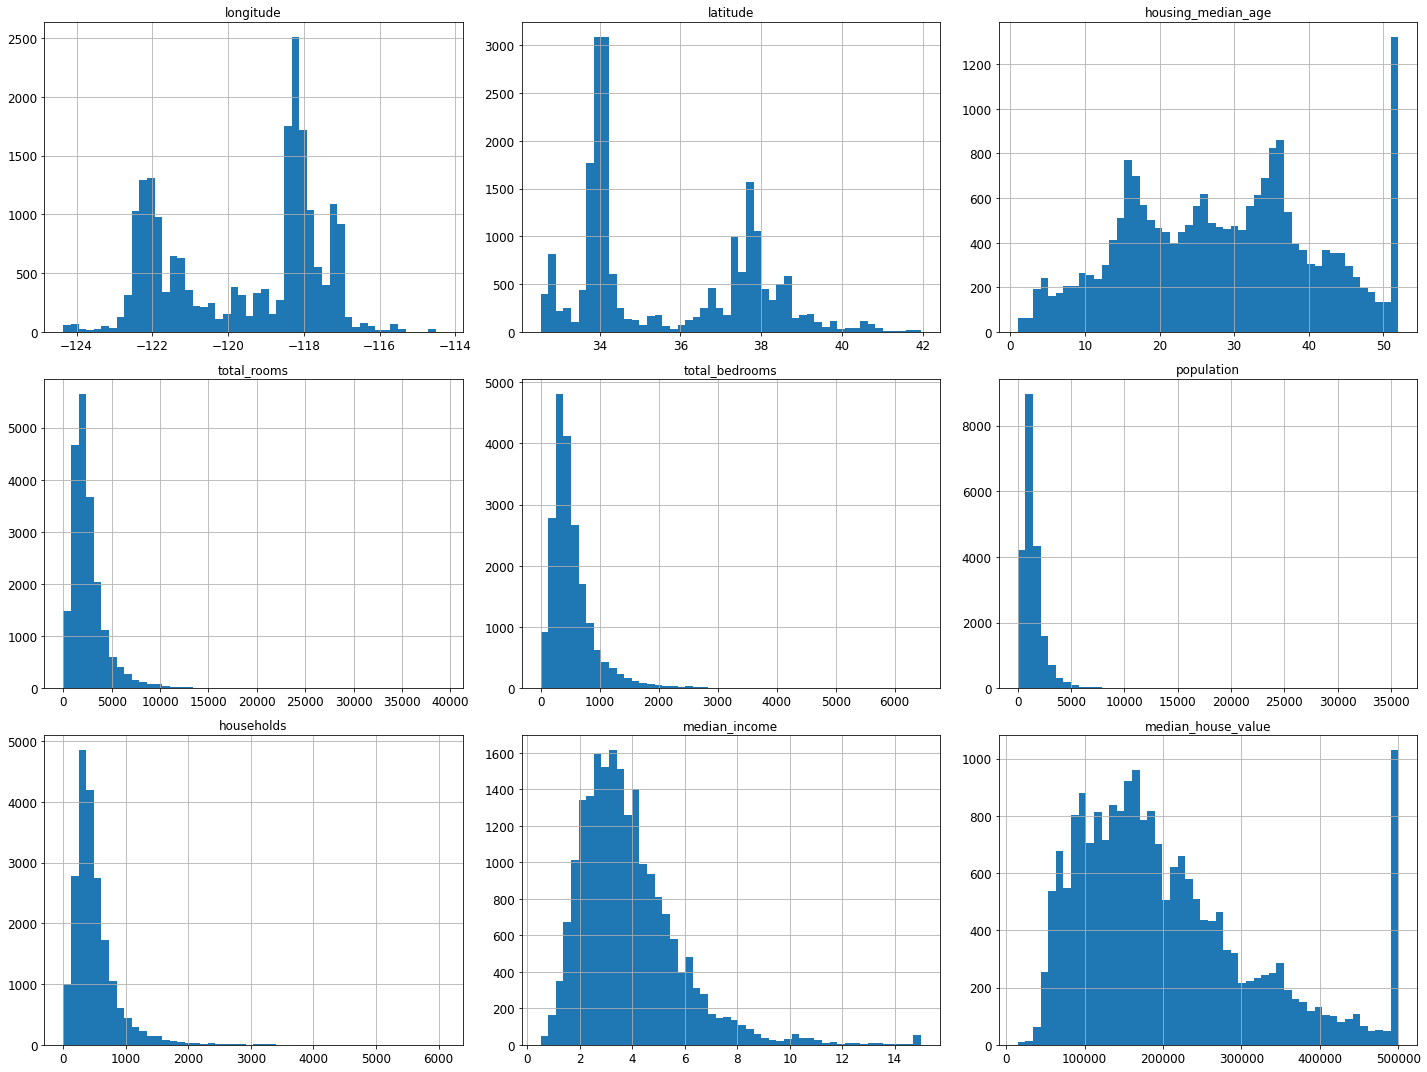

In [ ]:
# jupyter의 매직 명령어
%matplotlib inline
import matplotlib.pyplot as plt
housing.hist(bins=50, figsize=(20, 15))
save_fig("attribute_histogram_plots")
plt.show()

In [ ]:
# 노트북의 실행 결과가 동일하도록
np.random.seed(42)

In [ ]:
import numpy as np

# train-test 으로 dataset 나누기 (슬라이싱 사용)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# train: 80%, test: 20%
train_set, test_set = split_train_test(housing, 0.2)
len(train_set)

16512

In [ ]:
# test_set의 길이
len(test_set)

4128

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


In [ ]:
train_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND


In [ ]:
# scikit-learn 에서 제공하는 함수를 이용 (위의 함수와 값이 동일한지 확인)
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)

In [ ]:
test_set.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
20046,-119.01,36.06,25.0,1505.0,NaN,1392.0,359.0,1.6812,47700.0,INLAND
3024,-119.46,35.14,30.0,2943.0,NaN,1565.0,584.0,2.5313,45800.0,INLAND
15663,-122.44,37.80,52.0,3830.0,NaN,1310.0,963.0,3.4801,500001.0,NEAR BAY
20484,-118.72,34.28,17.0,3051.0,NaN,1705.0,495.0,5.7376,218600.0,<1H OCEAN
9814,-121.93,36.62,34.0,2351.0,NaN,1063.0,428.0,3.7250,278000.0,NEAR OCEAN


### 데이터 이해를 위한 탐색과 시각화

In [ ]:
# copy를 통해 메모리상에서 객체 복사
housing = train_set.copy()

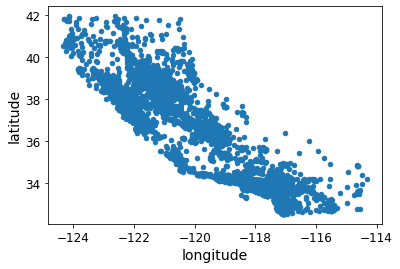

In [ ]:
# 데이터 시각화
housing.plot(kind='scatter', x='longitude', y='latitude')

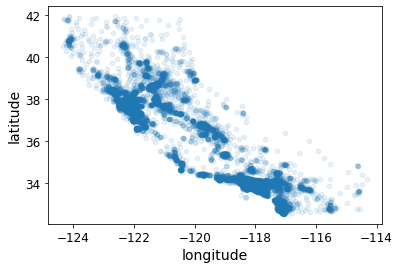

In [ ]:
# alpha=0.1 을 주면 데이터 포인트가 밀집된 영역을 잘 보여줌
housing.plot(kind='scatter', x='longitude', y='latitude', alpha=0.1)

In [ ]:
# 상관관계 조사
corr_matrix = housing.corr()

In [ ]:
# median_house_value와 다른 특성 사이의 상관관계 확인, 내림차순 정렬렬렬
# 1에 갈수록 상관관계가 높으며, 0에 갈수록 상관관계가 낮다
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

Saving figure scatter_matrix_plot


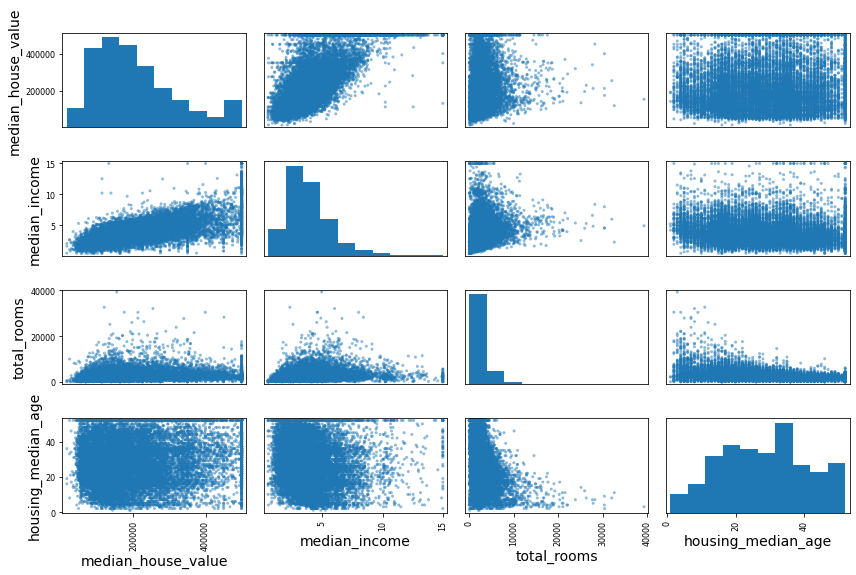

In [ ]:
# 숫자형 특성 사이에 산점도를 그려주는 scatter_matrix 함수 사용
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

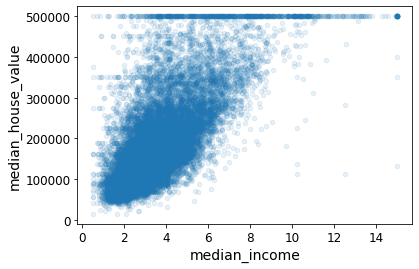

In [ ]:
# median_income과 median_house_value간의 상관관계 산점도 확인
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

###### 매개변수의 값을 조정해가며 실험

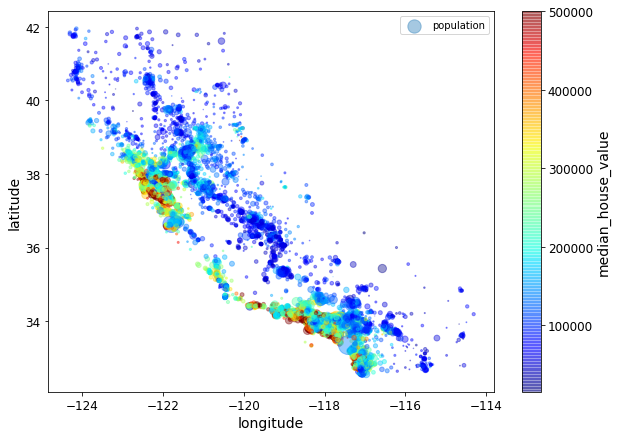

In [ ]:
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10,7),
             c="median_house_value", cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

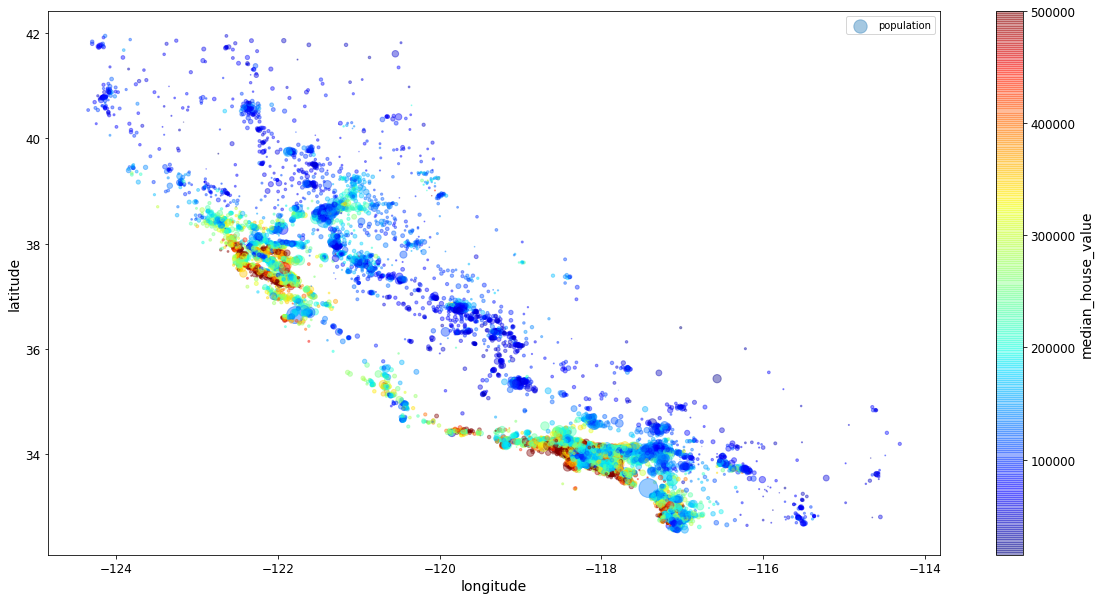

In [ ]:
# figsize 조정 (그래프 크기 사이즈 변경)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(20, 10),
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

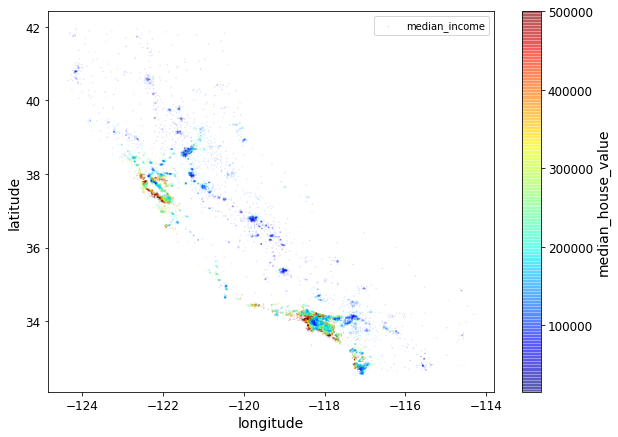

In [ ]:
# housing[population] -> housing[median_income]
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["median_income"]/100, label="median_income", figsize=(10, 7),
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

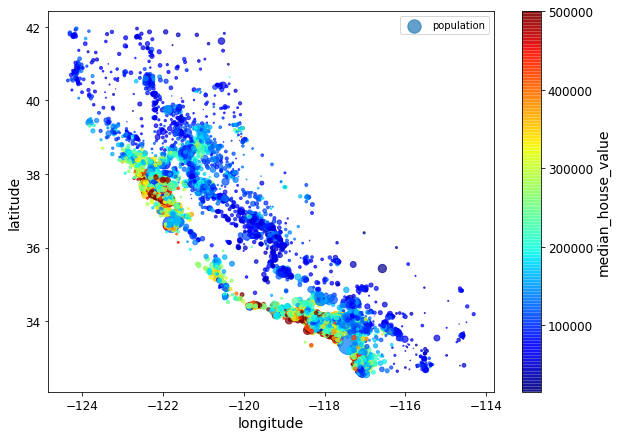

In [ ]:
# alpha=0.4 > 0.1
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.7,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

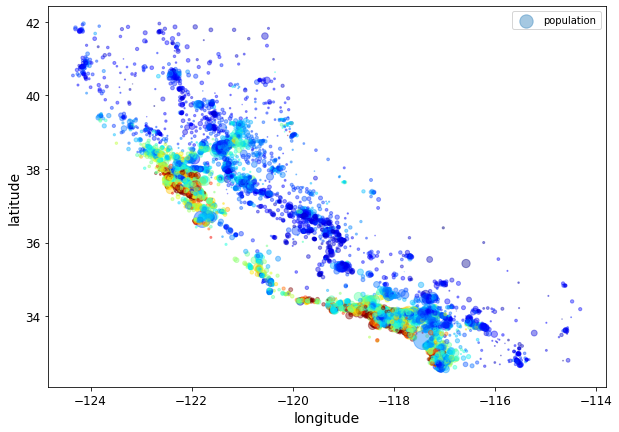

In [ ]:
# colorbar=True -> False
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=False,
             sharex=False)
plt.legend()

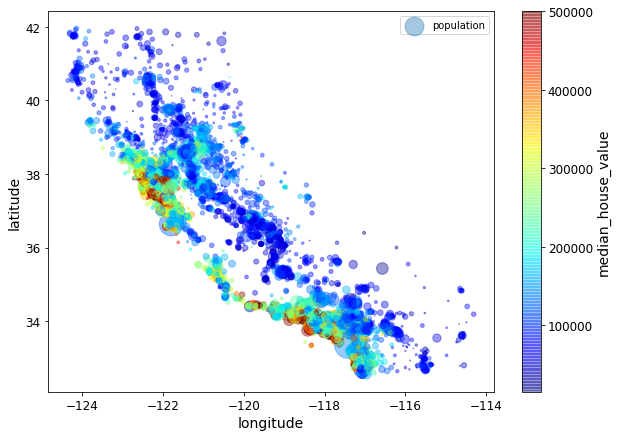

In [ ]:
# s=housing["population"]/100 -> s=housing["population"]/50
# s는 포인트의 사이즈 (100으로 나눈 값이 적당한 사이즈)
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/50, label="population", figsize=(10, 7),
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

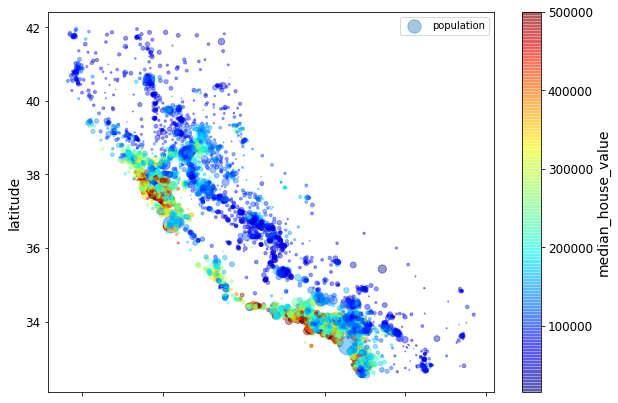

In [ ]:
# sharex=False -> True
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=True)
plt.legend()

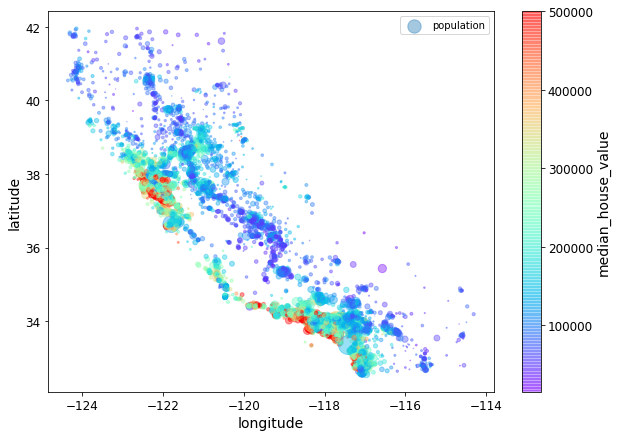

In [ ]:
# get_cmap("jet") -> get_cmap("rainbow")
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="median_house_value",cmap=plt.get_cmap("rainbow"), colorbar=True,
             sharex=False)
plt.legend()

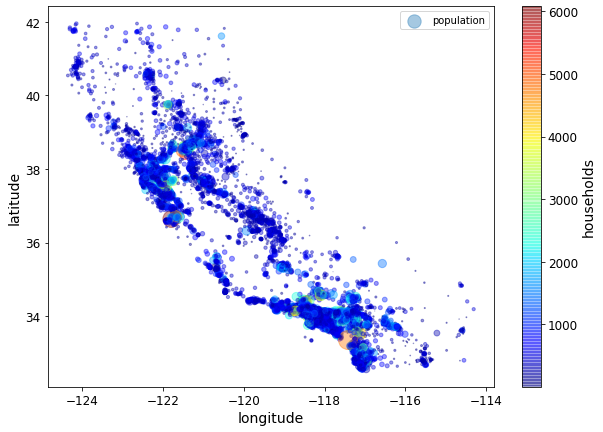

In [ ]:
# c="median_house_value" -> c="household"
housing.plot(kind="scatter", x="longitude", y="latitude", alpha=0.4,
             s=housing["population"]/100, label="population", figsize=(10, 7),
             c="households",cmap=plt.get_cmap("jet"), colorbar=True,
             sharex=False)
plt.legend()

###### 매개변수의 값을 조정해가며 실험 끝

Saving figure scatter_matrix_plot


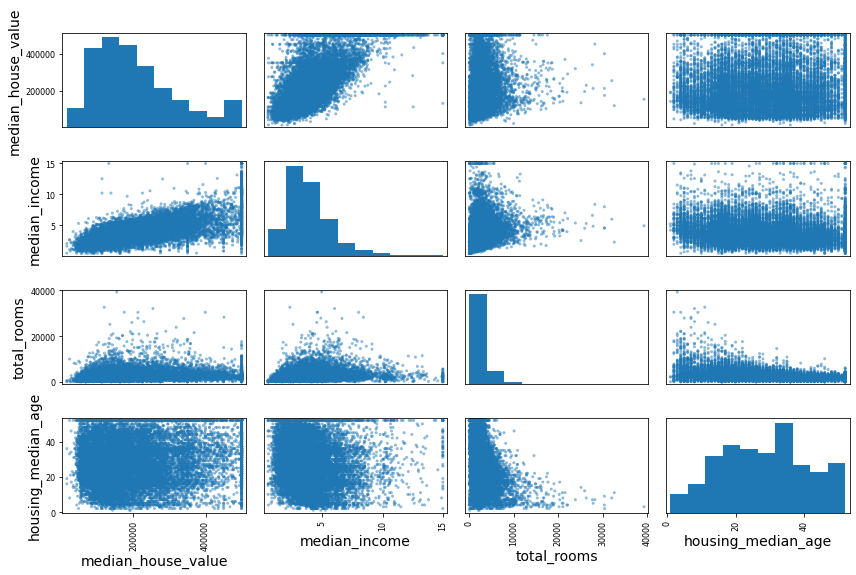

In [ ]:
# 분석 -> x축: median_house_value, y축: median_income일 경우 상관관계가 높다
# 숫자형 특성 사이에 산점도를 그려주는 scatter_matrix 함수 사용
from pandas.plotting import scatter_matrix

attributes = ["median_house_value", "median_income", "total_rooms",
              "housing_median_age"]
scatter_matrix(housing[attributes], figsize=(12, 8))
save_fig("scatter_matrix_plot")

In [ ]:
# 1에 갈수록 상관관계가 높으며, 0에 갈수록 상관관계가 낮다
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

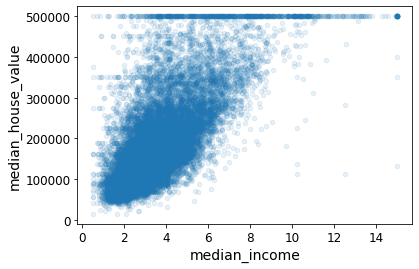

In [ ]:
# alpha=0.1 을 주면 데이터 포인트가 밀집된 영역을 잘 보여줌
housing.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)

In [ ]:
# 특성 조합으로 실험
# 객체끼리 사칙연산을 하려면, 데이터의 element 개수가 같아야함
housing["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"] = housing["total_bedrooms"]/housing["total_rooms"]
housing["population_per_household"] = housing["population"]/housing["households"]

In [ ]:
# column이 추가된 것을 확인
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,rooms_per_household,bedrooms_per_room,population_per_household
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,103000.0,NEAR OCEAN,5.017657,0.200576,3.691814
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,382100.0,NEAR OCEAN,4.473545,0.232703,1.738095
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,172600.0,NEAR OCEAN,5.645833,0.174486,2.723214
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,93400.0,NEAR OCEAN,4.002817,0.258269,3.994366
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,96500.0,INLAND,6.268421,0.180940,2.300000


In [ ]:
# column이 추가된 것을 확인
# 상관관계 행렬을 다시 확인
corr_matrix = housing.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
bedrooms_per_room          -0.257419
Name: median_house_value, dtype: float64

# 머신러닝 알고리즘을 위한 데이터 준비

In [ ]:
# drop()은 데이터 복사본을 만듦
housing = train_set.drop("median_house_value", axis=1) # 방향 지정: axis=1, 훈련 세트를 위해 레이블 삭제
housing_labels = train_set["median_house_value"].copy() # .copy() 데이터 복사 후 새로운 객체 생성

In [ ]:
# mediam_house_value 데이터 누락 확인
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
14196,-117.03,32.71,33.0,3126.0,627.0,2300.0,623.0,3.2596,NEAR OCEAN
8267,-118.16,33.77,49.0,3382.0,787.0,1314.0,756.0,3.8125,NEAR OCEAN
17445,-120.48,34.66,4.0,1897.0,331.0,915.0,336.0,4.1563,NEAR OCEAN
14265,-117.11,32.69,36.0,1421.0,367.0,1418.0,355.0,1.9425,NEAR OCEAN
2271,-119.80,36.78,43.0,2382.0,431.0,874.0,380.0,3.5542,INLAND


In [ ]:
# 레이블 값 확인
housing_labels.head()

14196    103000.0
8267     382100.0
17445    172600.0
14265     93400.0
2271      96500.0
Name: median_house_value, dtype: float64

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() # null인 행이 하나라도 있으면 인덱스 출력
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


# ----------Debugging----------

In [ ]:
housing.info() # total_rooms가 null 값이 없음을 확인

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 14196 to 15795
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16512 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [ ]:
# 재다운로드
housing = load_housing_data()
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [ ]:
# 데이터에 대한 전반적인 정보 확인
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [ ]:
# 다시 섞이게 하기 위해 seed 값 변경
# 항상 같은 난수 인덱스가 생성되도록 seed 값 설정
np.random.seed(789)

In [ ]:
import numpy as np

# train-test 으로 dataset 나누기 (슬라이싱 사용)
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data)) # 무작위로 섞인 배열을 만듦
    test_set_size = int(len(data) * test_ratio) # 전체 데이터 개수 x test_ratio만큼 테스트셋 크기로 설정
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [ ]:
# 위에서 적은 split_train_test 함수를 통해
# train_set: 80%, test_set: 20% 비율로 샘플을 나눔
train_set, test_set = split_train_test(housing, 0.2)

In [ ]:
train_set[train_set.isnull().any(axis=1)].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,340900.0,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,231700.0,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,133800.0,INLAND
13925,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,48500.0,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,158700.0,INLAND


In [ ]:
housing = train_set.drop("median_house_value", axis=1) # 방향 지정: axis=1, 훈련 세트를 위해 레이블 삭제
housing_labels = train_set["median_house_value"].copy() # .copy() 데이터 복사 후 새로운 객체 생성

In [ ]:
sample_incomplete_rows = housing[housing.isnull().any(axis=1)].head() # null인 행이 하나라도 있으면 인덱스 출력
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,NaN,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,NaN,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,NaN,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,NaN,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,NaN,2400.0,843.0,4.7147,INLAND


# ----------Debugging Finish----------

In [ ]:
# 데이터 정제: 해당 구역을 제거
sample_incomplete_rows.dropna(subset=["total_bedrooms"])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity


In [ ]:
# 데이터 정제: 전체 특성을 삭제
sample_incomplete_rows.drop("total_bedrooms", axis=1)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,2400.0,843.0,4.7147,INLAND


In [ ]:
# 데이터 정제: median으로 채움
median = housing["total_bedrooms"].median()
sample_incomplete_rows["total_bedrooms"].fillna(median, inplace=True)

In [ ]:
# 자료 특성 확인
sample_incomplete_rows

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
16879,-122.39,37.60,34.0,707.0,432.0,381.0,156.0,4.3750,NEAR OCEAN
5665,-118.29,33.73,30.0,3161.0,432.0,1865.0,771.0,2.7139,NEAR OCEAN
19932,-119.33,36.30,11.0,3045.0,432.0,1563.0,516.0,5.4337,INLAND
13925,-114.59,34.83,41.0,812.0,432.0,375.0,158.0,1.7083,INLAND
13311,-117.61,34.08,12.0,4427.0,432.0,2400.0,843.0,4.7147,INLAND


In [ ]:
# 중간값 확인
median

432.0

In [ ]:
# SimpleImputer는 누락된 값을 손쉽게 다루도록 함
# 누락된 값을 특성의 중간값으로 대체
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="median")

In [ ]:
# 수치형 특성을 제외한 텍스트 특성(ocean_proximity)을 제거
housing_num = housing.drop("ocean_proximity", axis=1)

In [ ]:
# fit() 메서드를 통해 훈련 데이터에 적용
imputer.fit(housing_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [ ]:
# imputer는 각 특성의 중간값을 계산해서 결과를 객체의 statistics_ 속성에 저장
imputer.statistics_

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  432.     ,
       1164.     ,  407.     ,    3.54355])

In [ ]:
# 각 속성의 중앙값을 수동으로 계산하는 것과 동일한 지 확인
housing_num.median().values

array([-118.5    ,   34.26   ,   29.     , 2118.     ,  432.     ,
       1164.     ,  407.     ,    3.54355])

In [ ]:
# 누락된 값을 중간값으로 채움
X = imputer.transform(housing_num)

In [ ]:
X

array([[-122.03  ,   37.6   ,   24.    , ..., 1488.    ,  389.    ,
           4.5721],
       [-118.01  ,   33.85  ,   29.    , ..., 1265.    ,  400.    ,
           3.8864],
       [-118.5   ,   34.21  ,   36.    , ...,  629.    ,  245.    ,
           4.9643],
       ...,
       [-121.46  ,   38.56  ,   52.    , ...,  764.    ,  369.    ,
           2.9191],
       [-121.99  ,   37.26  ,   29.    , ...,  982.    ,  339.    ,
           7.9234],
       [-118.31  ,   34.05  ,   35.    , ..., 1578.    ,  406.    ,
           2.5313]])

In [ ]:
# 판다스 데이터프레임으로 되돌리기
housing_tr = pd.DataFrame(X, columns=housing_num.columns,
                          index=housing.index)

In [ ]:
# 결측값이 채워짐을 확인
housing_tr.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
851,-122.03,37.60,24.0,2077.0,383.0,1488.0,389.0,4.5721
11666,-118.01,33.85,29.0,2064.0,447.0,1265.0,400.0,3.8864
3877,-118.50,34.21,36.0,1254.0,229.0,629.0,245.0,4.9643
2573,-124.11,40.81,23.0,959.0,212.0,425.0,175.0,2.5536
3330,-122.48,38.90,10.0,304.0,63.0,161.0,61.0,2.1964


In [ ]:
# 동작 안함
# X.head()

# 텍스트와 범주형 특성 다루기

In [ ]:
# 데이터셋에서 텍스트 특성인 ocean_proximity를 전처리
housing_cat = housing[["ocean_proximity"]]
housing_cat.head(10)

,ocean_proximity
851,NEAR BAY
11666,<1H OCEAN
3877,<1H OCEAN
2573,NEAR OCEAN
3330,INLAND
9659,INLAND
17286,NEAR OCEAN
120,NEAR BAY
1488,NEAR BAY
11219,<1H OCEAN


In [ ]:
# class / 메서드 구분: 앞에가 대문자면 class
from sklearn.preprocessing import OrdinalEncoder

# 텍스트를 숫자로 변환 (인코딩)
ordinal_encoder = OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]

# OrdinalEncoder를 사용하면 숫자가 의미를 갖는 것처럼 기계가 오해할 수 있음
# 의미있는 숫자가 아님

array([[3.],
       [0.],
       [0.],
       [4.],
       [1.],
       [1.],
       [4.],
       [3.],
       [3.],
       [0.]])

In [ ]:
# 카테고리 목록 확인
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# OneHotEncoder를 사용하여 범주형 값을 원-핫 벡터로 변경
# sparse matrix(희소 행렬) 형태의 output으로 반환
from sklearn.preprocessing import OneHotEncoder

cat_encoder = OneHotEncoder()
housing_cat_1hot = cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
# numpy 배열로 바꾸려면 toarray() 메서드를 호출
housing_cat_1hot.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.]])

In [ ]:
# 카테고리 리스트 확인
cat_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [ ]:
# 사이킷런은 덕 타이핑 지원
from sklearn.base import BaseEstimator, TransformerMixin

# 열 인덱스
rooms_ix, bedrooms_ix, population_ix, households_ix = 3, 4, 5, 6

class CombinedAttributesAdder(BaseEstimator, TransformerMixin): # BaseEstimator, TransformerMixin 상속
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room # *args 또는 **kargs 없음, 생성자에 해당하는 메서드
    def fit(self, X, y=None):
        return self # 아무것도 하지 않습니다
    def transform(self, X):
        rooms_per_household = X[:, rooms_ix] / X[:, households_ix]
        population_per_household = X[:, population_ix] / X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

# 인스턴스 = 클래스(인자들)
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [ ]:
# DataFrame을 복구하려면 다음을 실행할 수 있음
housing_extra_attribs = pd.DataFrame(
    housing_extra_attribs,
    columns=list(housing.columns)+["rooms_per_household", "population_per_household"],
    index=housing.index)
housing_extra_attribs.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,rooms_per_household,population_per_household
851,-122.03,37.6,24,2077,383,1488,389,4.5721,NEAR BAY,5.33933,3.82519
11666,-118.01,33.85,29,2064,447,1265,400,3.8864,<1H OCEAN,5.16,3.1625
3877,-118.5,34.21,36,1254,229,629,245,4.9643,<1H OCEAN,5.11837,2.56735
2573,-124.11,40.81,23,959,212,425,175,2.5536,NEAR OCEAN,5.48,2.42857
3330,-122.48,38.9,10,304,63,161,61,2.1964,INLAND,4.98361,2.63934


In [ ]:
# 수치 특성을 전처리하기 위한 파이프라인 작성
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [ ]:
housing_num_tr

array([[-1.22457025,  0.91883375, -0.36978199, ..., -0.03663245,
         0.06883982, -0.44128976],
       [ 0.77975225, -0.83683722,  0.02771295, ..., -0.10752009,
         0.00821971,  0.04211812],
       [ 0.53544428, -0.66829281,  0.58420585, ..., -0.12397698,
        -0.04622217, -0.46811225],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ..., -0.2725341 ,
        -0.09167505, -0.0179651 ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  1.02209413,
        -0.01608941, -1.1943049 ],
       [ 0.63017594, -0.74320144,  0.50470687, ..., -0.49984832,
         0.07446617,  0.54447575]])

In [ ]:
# 하나의 변환기로 각 열마다 적절한 변환을 적용하여 모든 열을 처리하기 위해 ColumnTransformer 사용
from sklearn.compose import ColumnTransformer

num_attribs = list(housing_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

housing_prepared = full_pipeline.fit_transform(housing)

In [ ]:
housing_prepared

array([[-1.22457025,  0.91883375, -0.36978199, ...,  0.        ,
         1.        ,  0.        ],
       [ 0.77975225, -0.83683722,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.53544428, -0.66829281,  0.58420585, ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [-0.94037527,  1.36828552,  1.85618964, ...,  0.        ,
         0.        ,  0.        ],
       [-1.20462674,  0.75965291,  0.02771295, ...,  0.        ,
         0.        ,  0.        ],
       [ 0.63017594, -0.74320144,  0.50470687, ...,  0.        ,
         0.        ,  0.        ]])

In [ ]:
# 모양 확인
housing_prepared.shape

(16512, 16)

(3주차 수업 내용)
- 누락된 데이터 처리
- 텍스트 데이터 처리
- 파이프라인으로 합치기

# ==========4주차==========

# 모델 선택과 훈련

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels) # 선형회귀 모델 훈련

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# 훈련 세트에 있는 몇 개의 샘플에 대한 적용
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

print("예측:", lin_reg.predict(some_data_prepared))

예측: [232433.25594836 216202.27094272 268582.12316139 152442.80587052
  81912.78283468]


In [ ]:
# 예측값과 비교
print("레이블:", list(some_labels))

레이블: [214700.0, 209300.0, 236100.0, 96100.0, 112500.0]


In [ ]:
# 훈련 세트에 대한 회귀 모델의 RMSE((루트)평균제곱오차) 측정
from sklearn.metrics import mean_squared_error

housing_predictions = lin_reg.predict(housing_prepared) # 모든 데이터에 대한 예측값
lin_mse = mean_squared_error(housing_labels, housing_predictions) # 각 데이터의 개수가 같아야함
lin_rmse = np.sqrt(lin_mse)
lin_rmse

68213.22377834738

In [ ]:
# 5개의 데이터에 대한 rmse 예측값
from sklearn.metrics import mean_squared_error

some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)

predictions = lin_reg.predict(some_data_prepared) # 예측값
some_lin_mse = mean_squared_error(some_labels, predictions) # 레이블과 예측값의 MSE 게산
some_lin_rmse = np.sqrt(some_lin_mse)
some_lin_rmse

33248.42150553884

In [ ]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels) # DecisionTreeRegressor 모델 훈련

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [ ]:
# 훈련 세트에 대한 회귀 모델의 RMSE((루트)평균제곱오차) 측정
# 사례기반학습에 가까움
housing_predictions = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

###### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html?highlight=cross_val_score#sklearn.model_selection.cross_val_score

In [ ]:
# 교차 검증을 사용한 평가 (k겹 교차 검증)
# 매번 다른 폴드를 선택해 평가에 사용, 나머지 9개 폴드는 훈련에 사용
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10) # 결과는 10개의 평가 점수가 담긴 배열
tree_rmse_scores = np.sqrt(-scores)

# 결과(점수, 평균, 표준편차) 출력
print("scores: ", tree_rmse_scores)
print("mean: ", tree_rmse_scores.mean())
print("std: ", tree_rmse_scores.std())

scores:  [68975.14706666 70329.05217495 71408.00279658 73392.57031216
 67807.13763698 72342.43159365 70750.04547093 68659.25580569
 67848.32573598 72844.11771341]
mean:  70435.60863069972
std:  1952.6279035911564


In [ ]:
# 결과 확인
def display_scores(scores):
    print("점수: ", scores)
    print("평균: ", scores.mean())
    print("표준편차: ", scores.std())

display_scores(tree_rmse_scores)

점수:  [68975.14706666 70329.05217495 71408.00279658 73392.57031216
 67807.13763698 72342.43159365 70750.04547093 68659.25580569
 67848.32573598 72844.11771341]
평균:  70435.60863069972
표준편차:  1952.6279035911564


In [ ]:
# 선형 회귀 모델의 결과 확인
# 결정 트리보다 결과가 좋음 (오차율이 더 적음)
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)
display_scores(lin_rmse_scores)

점수:  [68854.17619174 66633.60719241 67282.41806373 70823.75342858
 69865.43665126 71107.34985757 67571.26205744 67430.6423321
 67092.06115303 68874.57738805]
평균:  68553.52843159242
표준편차:  1524.9234819558046


In [ ]:
# 앙상블 학습: 여러 다른 모델을 모아서 하나의 모델을 만드는 것
# 랜덤 포레스트: 특성을 무작위로 선택해서 많은 결정 트리를 만들고, 그 예측을 평균내는 방식으로 작동
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels) # 랜덤 포레스트 모델 훈련

housing_predictions = forest_reg.predict(housing_prepared) # 예측값
forest_mse = mean_squared_error(housing_labels, housing_predictions) # 레이블과 예측값의 MSE 게산
forest_rmse = np.sqrt(forest_mse)
forest_rmse

18570.287877384508

In [ ]:
# 앙상블 모델의 결과 확인
forest_scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                             scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-forest_scores)

display_scores(forest_rmse_scores)

점수:  [50835.68542849 49789.13380752 50810.19428344 49171.30377963
 49696.86344089 49988.42625797 50595.98432342 47288.41184728
 48927.81876709 51163.05195413]
평균:  49826.687388985956
표준편차:  1099.4457726799617


In [ ]:
from sklearn.ensemble import RandomForestRegressor

scores = cross_val_score(forest_reg, housing_prepared, housing_labels,
                         scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

# 결과 확인 (함수 사용 x)
print("scores: ", forest_rmse_scores)
print("mean: ", forest_rmse_scores.mean())
print("std: ", forest_rmse_scores.std())

scores:  [50952.21103985 49777.15647942 50981.40389709 49066.4770041
 50101.93690856 50310.50573366 50496.69677185 47127.41691488
 49197.01036092 51065.81306692]
mean:  49907.66281772599
std:  1144.1904737407442


In [ ]:
# # 모델 저장
# import joblib

# joblib.dump(my_model, "my_model.pkl")

# # 로드할 때
# my_model_loaded = joblib.load("my_model.pkl")

# 모델 세부 튜닝

In [ ]:
# RandomForestRegressor에 대한 최적의 파라미터 조합을 탐색
from sklearn.model_selection import GridSearchCV

# 훈련 방법에 대한 파라미터
param_grid = [
    # 12가지의 하이퍼파라미터 조합을 시도
    {'n_estimators': [3, 10 ,30], 'max_features': [2, 4, 6, 8]},
    # bootstrap은 False로 하고 6가지의 조합을 시도
    {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
    # 총 18가지 파라미터 조합
]

forest_reg = RandomForestRegressor()

# 5개의 폴드로 훈련하면 총 18 * 5 = 90번의 훈련
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)

grid_search.fit(housing_prepared, housing_labels)


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
# 탐색 범위에서의 최적의 조합
grid_search.best_params_

{'max_features': 6, 'n_estimators': 30}

In [ ]:
# 최적의 추정
grid_search.best_estimator_

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features=6, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=30, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [ ]:
# 각각의 평가 점수 확인
cvres = grid_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

64186.3181696778 {'max_features': 2, 'n_estimators': 3}
55221.9479221548 {'max_features': 2, 'n_estimators': 10}
52360.20382090992 {'max_features': 2, 'n_estimators': 30}
59880.61008142897 {'max_features': 4, 'n_estimators': 3}
52397.38796358641 {'max_features': 4, 'n_estimators': 10}
50083.149747737654 {'max_features': 4, 'n_estimators': 30}
59161.82719860971 {'max_features': 6, 'n_estimators': 3}
52171.59002668078 {'max_features': 6, 'n_estimators': 10}
49598.75835770954 {'max_features': 6, 'n_estimators': 30}
58823.067693902136 {'max_features': 8, 'n_estimators': 3}
51808.6426551011 {'max_features': 8, 'n_estimators': 10}
49726.47729027424 {'max_features': 8, 'n_estimators': 30}
61813.34163055653 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
53914.55902707992 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
58625.91014975974 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
51615.31141947288 {'bootstrap': False, 'max_features': 3, 'n_estimators': 10}

In [ ]:
# 최상의 모델과 오차 분석
# RandomForestRegressor가 정확한 예측을 만들기 위한 각 특성의 상대적인 중요도를 알려줌
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([7.02596286e-02, 6.85943067e-02, 4.21501337e-02, 1.72957888e-02,
       1.66161941e-02, 1.77591442e-02, 1.59652145e-02, 3.66252236e-01,
       4.49374819e-02, 1.10452328e-01, 8.11997207e-02, 1.28895016e-02,
       1.27004063e-01, 1.79556115e-04, 3.53776882e-03, 4.90693410e-03])

In [ ]:
# 중요도 다음에 그에 대응하는 특성 이름을 표시
extra_attribs = ["rooms_per_hhold", "pop_per_hhold", "bedrooms_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
attributes = num_attribs + extra_attribs + cat_one_hot_attribs
sorted(zip(feature_importances, attributes), reverse=True)

[(0.36625223560433345, 'median_income'),
 (0.12700406293868446, 'INLAND'),
 (0.11045232759638349, 'pop_per_hhold'),
 (0.08119972074525665, 'bedrooms_per_room'),
 (0.07025962860394158, 'longitude'),
 (0.06859430671989933, 'latitude'),
 (0.044937481887924284, 'rooms_per_hhold'),
 (0.042150133667849844, 'housing_median_age'),
 (0.017759144171658723, 'population'),
 (0.017295788815327288, 'total_rooms'),
 (0.01661619411087687, 'total_bedrooms'),
 (0.015965214510549, 'households'),
 (0.012889501585939961, '<1H OCEAN'),
 (0.004906934101318307, 'NEAR OCEAN'),
 (0.003537768824729305, 'NEAR BAY'),
 (0.000179556115327488, 'ISLAND')]

In [ ]:
# 테스트셋에서 최종 모델을 평가
final_model = grid_search.best_estimator_

# 예측 변수와 레이블을 얻음
X_test = test_set.drop("median_house_value", axis=1)
y_test = test_set["median_house_value"].copy()

# 데이터 변환
X_test_prepared = full_pipeline.transform(X_test)

final_predictions = final_model.predict(X_test_prepared)

final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
print(final_rmse)

49657.48299477374


In [ ]:
# 일반화 오차의 95% 신뢰 구간을 계산
from scipy import stats

confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([47521.73047645, 51705.09034202])